# **Titanic Competition with EDA and Predictions**

Titanic Challenge from Kaggle.com
I will perform EDA and then train the data using scikit-learn and predict whether passenger has survived or not. 
This code attempts to get higher scorer than 0.77511 which is baseline from tutorial predictions
I am using various sources available on kaggle to improve my prediction accuracy. 


## 1.  Import lbraries and data

In [23]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# check versions of libraries used. 
print("Pandas version: {}".format(pd.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("seaborn version: {}".format(sns.__version__))


Pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


In [24]:
# import the train data
# will contain the details of a subset of the passengers on board (891 to be exact) and importantly, 
#    will reveal whether they survived or not, also known as the “ground truth”.'''
train_data_raw = pd.read_csv("C:/Users/kk_71/PycharmProjects/Kaggle_data/titanic/train.csv")
# create a copy of original data
train_data = train_data_raw.copy(deep = True)


In [25]:
# import test data
#dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.
test_data_raw = pd.read_csv("C:/Users/kk_71/PycharmProjects/Kaggle_data/titanic/test.csv")
test_data = test_data_raw.copy(deep = True)

## 2. EDA on the data

In [26]:
# train data:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


In [27]:
# test data:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
print('train data shape: ', train_data.shape)
print('test data shape: ', test_data.shape)

train data shape:  (891, 12)
test data shape:  (418, 11)


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [54]:
print('Train columns with null values:\n', train_data.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_data.isnull().sum())
print("-"*10)


print('No. of people in each class for train data:\n',  train_data.Pclass.value_counts())
print('No. of people in each class for test data:\n',  test_data.Pclass.value_counts())
#train_data.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------
No. of people in each class for train data:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
No. of people in each class for test data:
 Pclass
3    218
1    107
2     93
Name: count, dtype: int64


3: 491 (55.11%)
1: 216 (24.24%)
2: 184 (20.65%)

3: 218 (52.15%)
1: 107 (25.60%)
2: 93 (22.25%)



In [61]:
test_data.Pclass.value_counts()/418 *100

Pclass
3    52.153110
1    25.598086
2    22.248804
Name: count, dtype: float64

In [62]:
# basic stats for train data
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [63]:
# test data stats:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### 2.1 **Looking at raw data:**
- Train data contains passenger id 1 to 891 (N = 891) and test data contains 892 to 1310 (N = 418).
- From Train data, age column has missing values or NaN values of 177 passengers (19.87%). 
- Test data, age column has missing 86 passengers (20.57%) and missing 1 fare info.
- Many Cabin numbers are missing from both data sets. Train data has 687 (77.10%) missing values and Test data has 327 (78.23%) missing cabin number. 
- Median age from train data: 28 years old and test data: 27 years old
- youngest and oldest age were 0.42 and 80 years old for train data and 0.17 and 76 for test data.
- 75% of people did not travel with parents or children 




In [64]:
# describe which includes data type Object
train_data.describe(include =['O']).transpose()

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [65]:
# describe which includes data type Object
test_data.describe(include =['O']).transpose()

,count,unique,top,freq
Name,418,418,"Peter, Master. Michael J",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


#### Notes:
- names are all unique value
- not all ticket numbers are unique and from train data 7 dubplicates and test has 5 duplicates
- most people embarked from port southampton 644 + 270 = 914.
- 577 male:314 female from train and test 266 male: 152 female

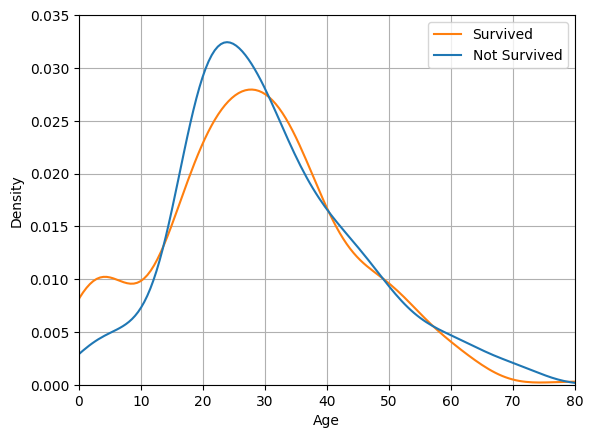

In [13]:
# create a univariate distribution plot for "Age" seperated by "Survived"
# common_norm = False: distribution for survived and not_survived passengers sum up individually to 1
#plt.subplot(1,2,1)
sns.kdeplot(data = train_data, x = "Age", hue = 'Survived', common_norm = False)

# limit x axis to max age 
plt.xlim(0, train_data['Age'].max())
plt.ylim(0, 0.035)
plt.grid()
plt.legend(['Survived','Not Survived'])
'''
plt.subplot(1,2,2)
sns.kdeplot(data = train_data, x = "Age", hue = 'Survived')
plt.xlim(0, train_data['Age'].max())
plt.ylim(0, 0.035)
plt.grid()
plt.legend(['Survived','Not Survived'])'''
plt.show()

Children below 12-ish have higher surival chance. Especially true for children who are <= 5years old as seen by the minor peak 
Adults above 58 years old, their chance at survival reduces fast

In [66]:
def age_category(row):
    ''' function to categorize acutal age 
    into 4 groups: children, adult, senior and no age '''

    if row < 12:
        return 'Children'
    if (row >= 12) & (row < 60):
        return 'Adult'
    if (row>= 60):
        return 'Senior'
    else:
        return 'no age'


# apply the function age_category to each row of the dataset
train_data['Age_category'] = train_data['Age'].apply(lambda row: age_category(row))
test_data['Age_category'] = test_data['Age'].apply(lambda row: age_category(row))

"\ndftrain = train_data.copy()\ndftest = test_data.copy()\n\ndftrain['Age_category'] = dftrain['Age'].apply(age_category)\ndftest['Age_category'] = dftest['Age'].apply(age_category)"

In [67]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,no age
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adult


In [31]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Adult
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Adult
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Adult
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Adult
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Adult


In [68]:
def pivot_survival_rate(df_train, target_column):
    # create a pivot table with the target_column as index and "survived" as columns
    # count the number of entries of "passengerID" for each combination of target_column and "survived"
    # fill all empty cell with 0
    df_pivot = pd.pivot_table(
        df_train[['PassengerId', target_column, 'Survived']],
        index = [target_column],
        columns = ['Survived'],
        aggfunc = 'count',
        fill_value = 0).reset_index()
    # remove the columns to avoid numbers as column names
    df_pivot.columns = [target_column, 'not_survived','survived']

    # create a new column with total number of survived and not survived passengers
    df_pivot['passengers'] = df_pivot['not_survived']+ df_pivot['survived']

    # create a new column with proportion of survivors to total passengers 
    df_pivot['survival_rate']= df_pivot['survived']/df_pivot['passengers']*100

    print(df_pivot.to_markdown())

In [69]:
pivot_survival_rate(train_data,'Age_category')

|    | Age_category   |   not_survived |   survived |   passengers |   survival_rate |
|---:|:---------------|---------------:|-----------:|-------------:|----------------:|
|  0 | Adult          |            376 |        244 |          620 |         39.3548 |
|  1 | Children       |             29 |         39 |           68 |         57.3529 |
|  2 | Senior         |             19 |          7 |           26 |         26.9231 |
|  3 | no age         |            125 |         52 |          177 |         29.3785 |


In [70]:
pivot_survival_rate(train_data,'Pclass')

|    |   Pclass |   not_survived |   survived |   passengers |   survival_rate |
|---:|---------:|---------------:|-----------:|-------------:|----------------:|
|  0 |        1 |             80 |        136 |          216 |         62.963  |
|  1 |        2 |             97 |         87 |          184 |         47.2826 |
|  2 |        3 |            372 |        119 |          491 |         24.2363 |


In [71]:
pivot_survival_rate(train_data,'Sex')

|    | Sex    |   not_survived |   survived |   passengers |   survival_rate |
|---:|:-------|---------------:|-----------:|-------------:|----------------:|
|  0 | female |             81 |        233 |          314 |         74.2038 |
|  1 | male   |            468 |        109 |          577 |         18.8908 |


- Children have highest survival rate as seen by kdeplot above.
- Women have significant higher surival rate
- First class has highest surival rate even higher than children.


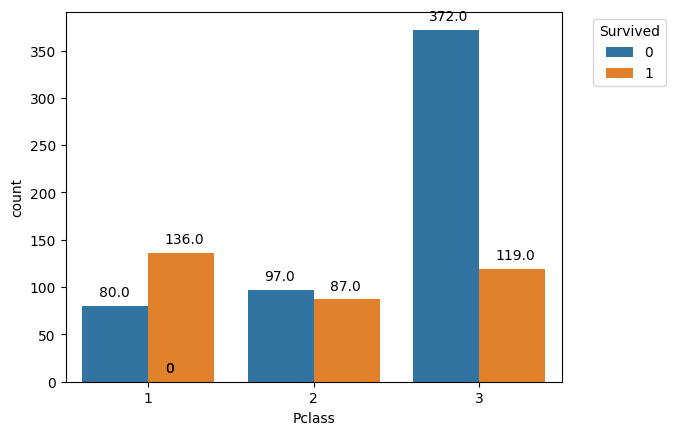

In [72]:
ax = sns.countplot(data = train_data, x = 'Pclass', hue = 'Survived')

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

ax.legend(title = 'Survived', bbox_to_anchor = (1.05,1), loc = 'upper left')

plt.show()

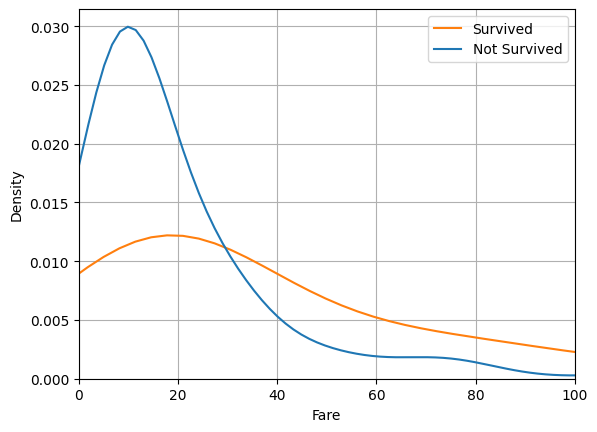

In [73]:
# create a univariate distribution plot for "Age" seperated by "Survived"
# common_norm = False: distribution for survived and not_survived passengers sum up individually to 1
#plt.subplot(1,2,1)
sns.kdeplot(data = train_data, x = "Fare", hue = 'Survived', common_norm = False)

# limit x axis to max age 
#plt.xlim(0, train_data['Age'].max())
plt.xlim(0, 100)
plt.grid()
plt.legend(['Survived','Not Survived'])
plt.show()

- crosses at fare = 30 implying if passenger paid above their surviability increaseses
- below 30, very high chance of not surviving

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


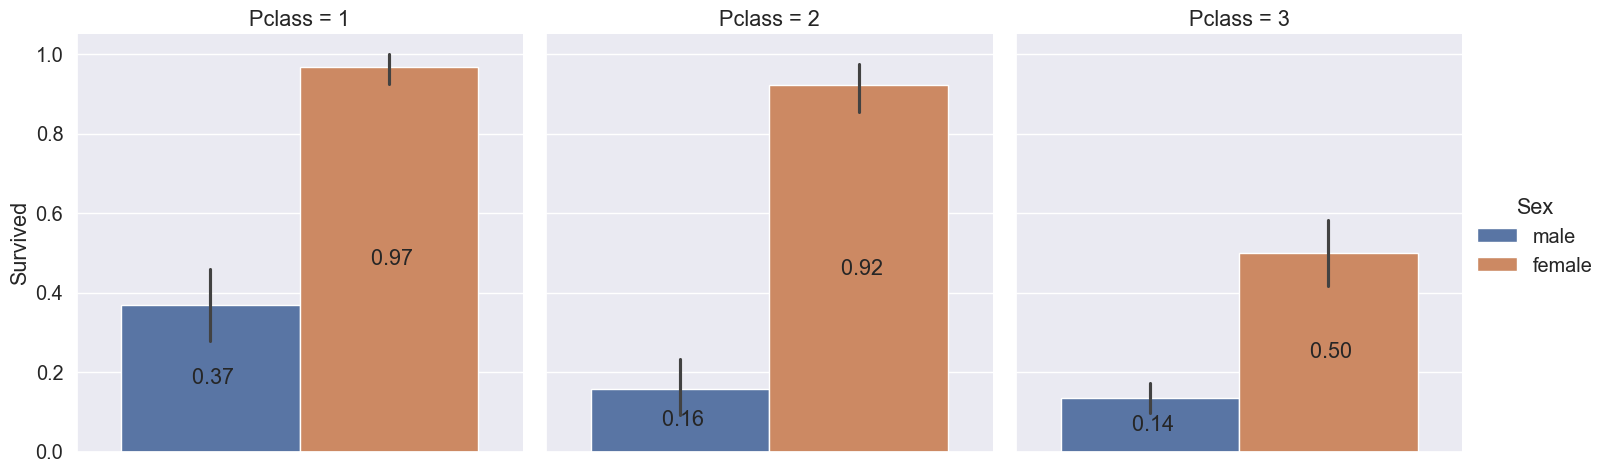

In [38]:
sns.set(font_scale=1.3)
g = sns.catplot( hue = "Sex", y = "Survived", col = "Pclass" ,data = train_data, kind = "bar")

# loop over the three different axes
for i in range(3):
    ax = g.facet_axis(0,i)
    for c in ax.containers:
        labels = [f'{(v.get_height()): .2f}' for v in c]
        ax.bar_label(c, labels = labels, label_type = 'center')

plt.show()

C:\Users\kk_71\AppData\Local\Temp\ipykernel_16328\2970150381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = "Survived", y = "Age", col = "Pclass", data = train_data, kind = "swarm", palette='deep')
C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the siz

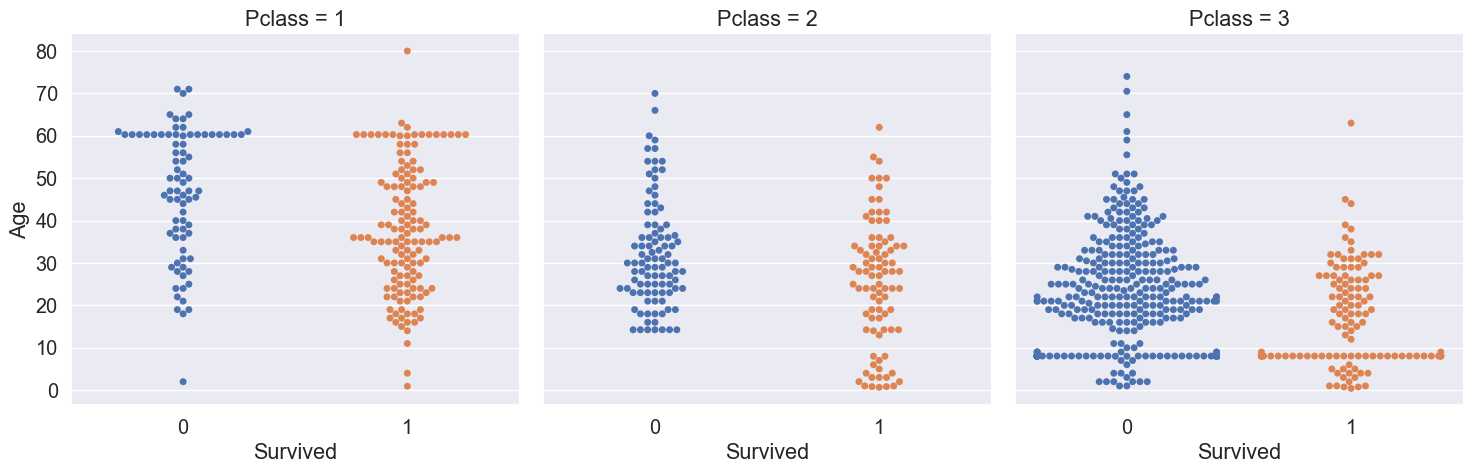

In [231]:
g = sns.catplot(x = "Survived", y = "Age", col = "Pclass", data = train_data, kind = "swarm", palette='deep')
plt.show()

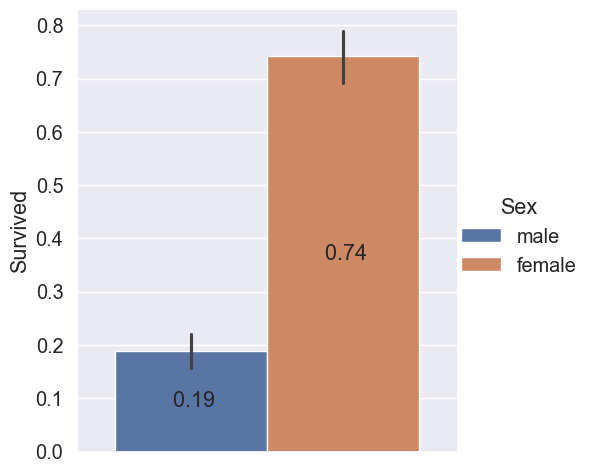

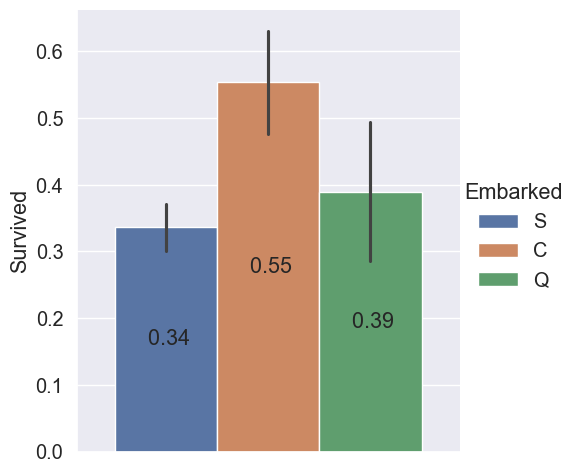

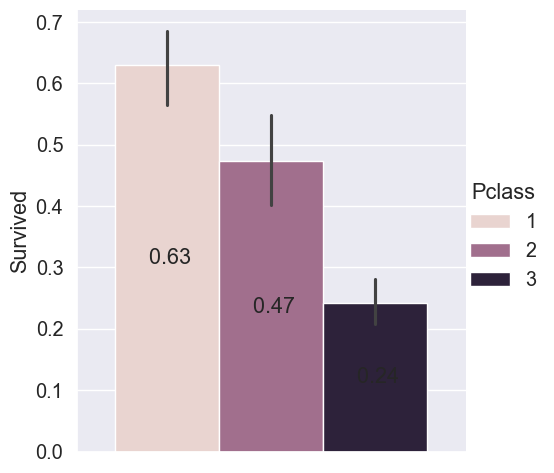

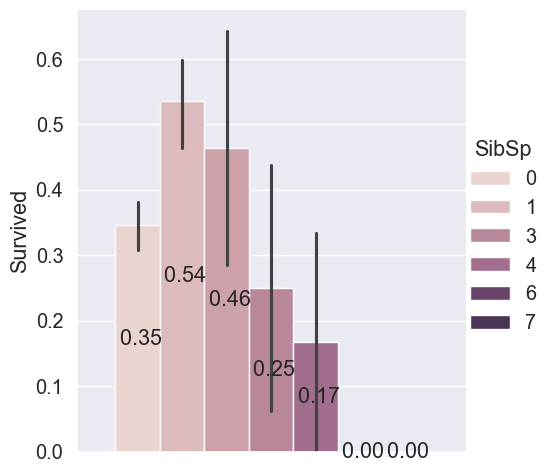

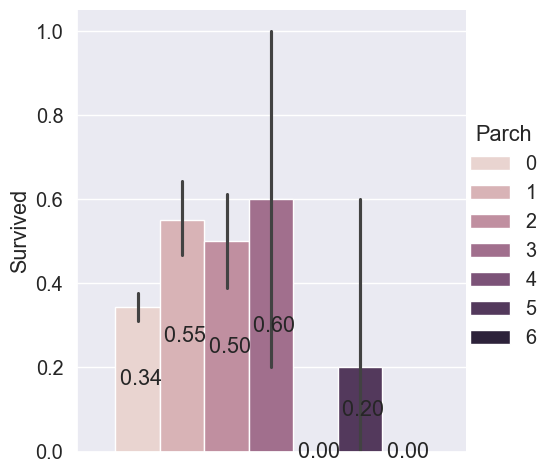

In [39]:
for feature in ["Sex", "Embarked", "Pclass", "SibSp","Parch"]:
    g = sns.catplot(hue = feature, y = "Survived", data = train_data, kind = "bar")

    ax = g.facet_axis(0,-1)

    for c in ax.containers:
        labels = [f'{(v.get_height()): .2f}' for v in c]
        ax.bar_label(c, labels = labels, label_type = 'center')


    plt.show()

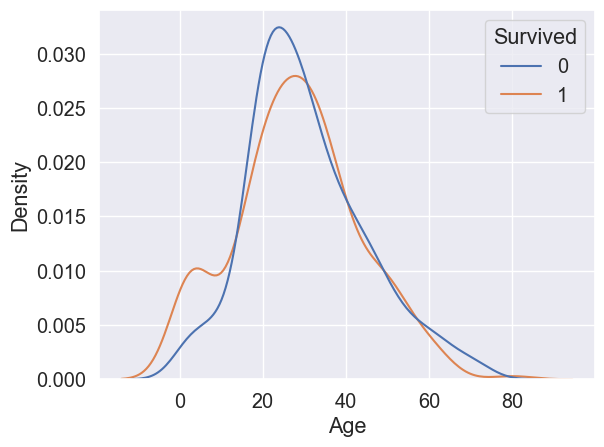

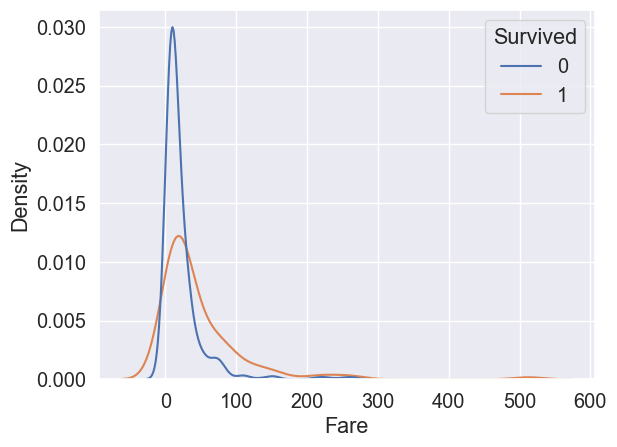

In [40]:
 for feature in ["Age", "Fare"]:
     g = sns.kdeplot(data = train_data, x = feature, hue = 'Survived', common_norm = False)
     plt.show()

# More Data Cleaning

### Extract titles

In [42]:
''' Extract titles of passengers so we can better estimate given ages and fare prices source: 
https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb'''

' Extract titles of passengers so we can better estimate given ages and fare prices source: https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb'

In [43]:
train_test_data = [train_data, test_data] # combining train and test dataset

In [44]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\kk_71\AppData\Local\Temp\ipykernel_16328\2802684788.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [45]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [46]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0


In [48]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult,2


In [49]:
# delete unnecessary feature from dataset
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [50]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Adult,0


In [51]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Adult,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Adult,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Adult,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Adult,2


In [52]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# train_data.fillna({"Fare": train_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)

train_data.fillna({"Age": train_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)
test_data.fillna({"Age": train_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)

#train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
#test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

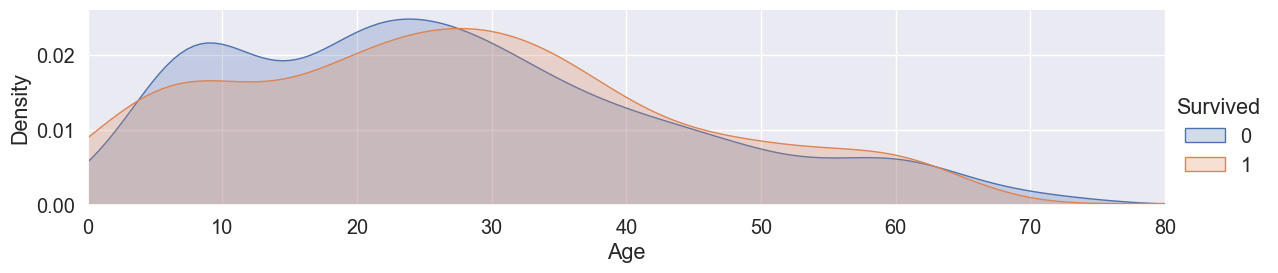

In [53]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
 
plt.show() 

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Age_category  891 non-null    object 
 12  Title         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Sex           418 non-null    object 
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          417 non-null    float64
 8   Cabin         91 non-null     object 
 9   Embarked      418 non-null    object 
 10  Age_category  418 non-null    object 
 11  Title         418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [56]:
train_test_data

[     PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch  \
 0              1         0       3    male  22.00      1      0   
 1              2         1       1  female  38.00      1      0   
 2              3         1       3  female  26.00      0      0   
 3              4         1       1  female  35.00      1      0   
 4              5         0       3    male  35.00      0      0   
 ..           ...       ...     ...     ...    ...    ...    ...   
 886          887         0       2    male  27.00      0      0   
 887          888         1       1  female  19.00      0      0   
 888          889         0       3  female   8.05      1      2   
 889          890         1       1    male  26.00      0      0   
 890          891         0       3    male  32.00      0      0   
 
                Ticket     Fare Cabin Embarked Age_category  Title  
 0           A/5 21171   7.2500   NaN        S        Adult      0  
 1            PC 17599  71.2833   C85       

In [57]:
''' Create categorical age group '''

' Create categorical age group '

In [58]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16,'Age_group'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age_group'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age_group'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age_group'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age_group'] = 4

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,1.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,3.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Adult,2,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,2.0


In [60]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Adult,0,2.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Adult,2,3.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,3.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Adult,0,2.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Adult,2,1.0


<Axes: >

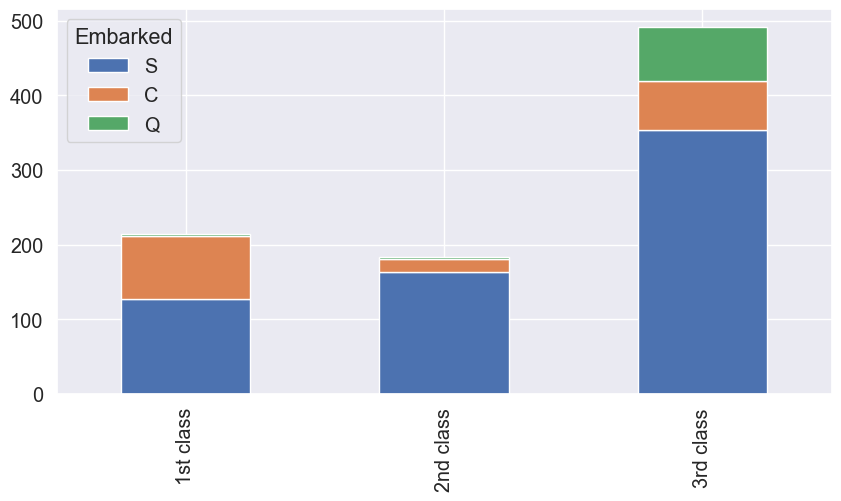

In [61]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- more than 50% of 1st class are from S embark
- more than 50% of 2nd class are from S embark
- more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**
- Convert string categorical data into numerical
- S = 0, C = 1, Q = 2


In [62]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [63]:
train_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Age_category      0
Title             0
Age_group         0
dtype: int64

In [64]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,Adult,0,1.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,Adult,2,3.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,Adult,2,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,Adult,0,2.0


## Missing Fare value

In [66]:
train_data.fillna({"Fare": train_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)

In [67]:
# fill missing Fare with median fare for each Pclass
train_data.fillna({"Fare": train_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)
test_data.fillna({"Fare": test_data.groupby("Pclass")["Fare"].transform("median")}, inplace = True)
train_data.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group
0,1,0,3,male,22.0000,1,0,A/5 21171,7.2500,NaN,0,Adult,0,1.0
1,2,1,1,female,38.0000,1,0,PC 17599,71.2833,C85,1,Adult,2,3.0
2,3,1,3,female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,1.0
3,4,1,1,female,35.0000,1,0,113803,53.1000,C123,0,Adult,2,2.0
4,5,0,3,male,35.0000,0,0,373450,8.0500,NaN,0,Adult,0,2.0
5,6,0,3,male,8.0500,0,0,330877,8.4583,NaN,2,no age,0,0.0
6,7,0,1,male,54.0000,0,0,17463,51.8625,E46,0,Adult,0,3.0
7,8,0,3,male,2.0000,3,1,349909,21.0750,NaN,0,Children,3,0.0
8,9,1,3,female,27.0000,0,2,347742,11.1333,NaN,0,Adult,2,2.0
9,10,1,2,female,14.0000,1,0,237736,30.0708,NaN,1,Adult,2,0.0


In [68]:
test_data.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
Age_category      0
Title             0
Age_group         0
dtype: int64

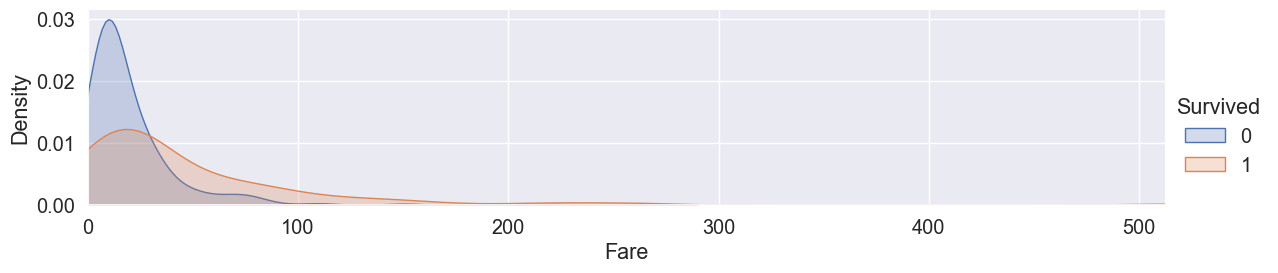

In [69]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [70]:
''' create numerical category for fare group where: 
fare <= 17 = 0
17<fare<=30 =1
30< fare <= 100 =2
fare > 100 = 3'''
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare_group'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare_group'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare_group'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare_group'] = 3

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group,Fare_group
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,Adult,0,1.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,Adult,2,3.0,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,1.0,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,Adult,2,2.0,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,Adult,0,2.0,0.0


## family size?

In [135]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] +1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] +1

(0.0, 11.0)

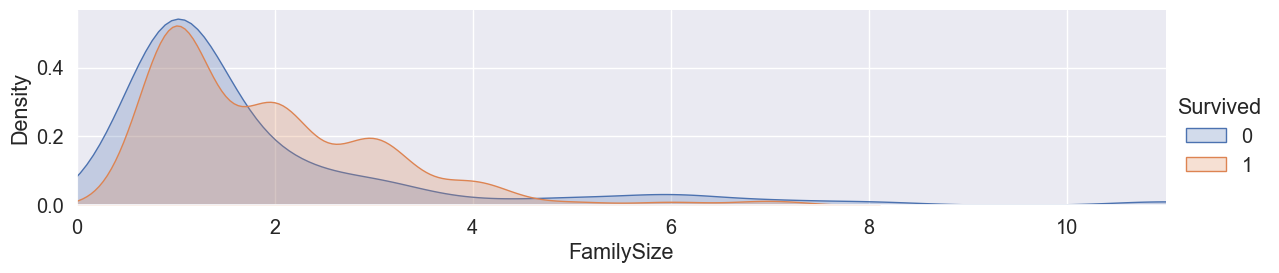

In [139]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [140]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [142]:
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Title,Age_group,Fare_group,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,Adult,0,1.0,0.0,0.4
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,Adult,2,3.0,2.0,0.4
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,1.0,0.0,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,Adult,2,2.0,2.0,0.4
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,Adult,0,2.0,0.0,0.0


# Modelling

Kaggle score Notes:
sub1: "Pclass", "Sex", "SibSp", "Parch" = 0.77511
sub2: "Pclass", "Sex", "SibSp", "Parch" ,'Age_group','Fare_group'  = 0.76794
sub3: "Pclass", "Sex",'Age_group','Fare_group','Title' = 0.77751 
sub4 Decision Tree: "Pclass", "Sex",'Age_group','Fare_group','Title','FamilySize','Embarked' =  0.77033
sub5 KNN: "Pclass", "Sex",'Age_group','Fare_group','Title','FamilySize','Embarked' = 0.78229 <---- so far current best prediction
sub6 KNN w Gridsearch: 0.77272

In [72]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# for saving submission
def save_submission(prediction, model_name):
    save_name = 'submission/submission_{}.csv'.format(model_name)

    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
    output.to_csv(save_name, index=False)
    print("Your submission was successfully saved!")

### Modelling: base features

In [74]:
''' Base feature meaning Pclass, Sex SibSp and parch. These are from intial tutorial for this challenge'''

' Base feature meaning Pclass, Sex SibSp and parch. These are from intial tutorial for this challenge'

In [76]:
# define my y (target survived)
base_y = train_data["Survived"]
base_features = ["Pclass", "Sex", "SibSp", "Parch"]
base_X = pd.get_dummies(train_data[base_features])
base_X_test = pd.get_dummies(test_data[base_features])

In [101]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest_model.fit(base_X,base_y)
predictions = random_forest_model.predict(base_X_test)

In [95]:
def feat_importance(current_model, X):
    importances = current_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in current_model.estimators_], axis = 0)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("{}. features{} ({:.3f})".format(f+1, X.columns[indices][f], importances[indices[f]]))


In [96]:
feat_importance(random_forest_model,base_X)

Feature ranking:
1. featuresSex_female (0.342)
2. featuresSex_male (0.285)
3. featuresPclass (0.216)
4. featuresParch (0.080)
5. featuresSibSp (0.077)


### Modelling: New Features

In [170]:
y = train_data["Survived"]
features = ["Pclass", "Sex",'Age_group','Fare_group','Title','FamilySize','Embarked']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [175]:
# KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [200]:
knn_model = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# kNN Score
round(np.mean(score)*100, 2)

[0.77777778 0.74157303 0.78651685 0.76404494 0.76404494 0.79775281
 0.80898876 0.83146067 0.80898876 0.83146067]


np.float64(79.13)

np.float64(83.05)

In [183]:
dt_model = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# decision tree Score
round(np.mean(score)*100, 2)

[0.81111111 0.79775281 0.83146067 0.84269663 0.84269663 0.84269663
 0.84269663 0.83146067 0.83146067 0.83146067]


np.float64(83.05)

In [184]:
rf_model = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Random Forest Score
round(np.mean(score)*100, 2)

[0.81111111 0.79775281 0.83146067 0.84269663 0.84269663 0.84269663
 0.84269663 0.83146067 0.83146067 0.83146067]


np.float64(83.05)

In [186]:
nb_model= GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Random Forest Score
round(np.mean(score)*100, 2)

[0.77777778 0.74157303 0.78651685 0.76404494 0.76404494 0.79775281
 0.80898876 0.83146067 0.80898876 0.83146067]


np.float64(79.13)

In [188]:
svm_model = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.77777778 0.74157303 0.78651685 0.76404494 0.76404494 0.79775281
 0.80898876 0.83146067 0.80898876 0.83146067]


np.float64(79.13)

In [191]:
dt_model.fit(X,y)
dt_prediction = dt_model.predict(X_test)


knn_model.fit(X,y)
knn_prediction = knn_model.predict(X_test)

In [192]:
save_submission(dt_prediction, 'dt1')
save_submission(knn_prediction, 'knn1')

Your submission was successfully saved!
Your submission was successfully saved!


In [194]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


In [195]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)

In [196]:
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X, y)
    train_score[neighbor]=knn.score(X, y)
    #est_score[neighbor]=knn.score(X_test, y_test)

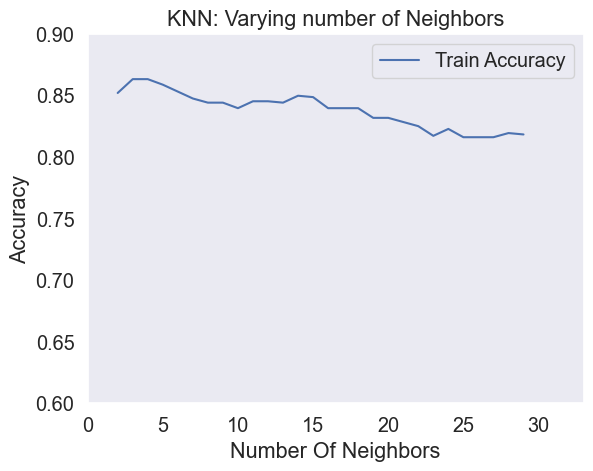

In [197]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [199]:
for key, value in train_score.items():
    if value==max(train_score.values()):
        print(key)

3
4


In [209]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# kNN Score
round(np.mean(score)*100, 2)

[0.77777778 0.74157303 0.78651685 0.76404494 0.76404494 0.79775281
 0.80898876 0.83146067 0.80898876 0.83146067]


np.float64(79.13)

In [210]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X, y)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': np.int64(7)}


In [211]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
y_pred=knn.predict(X_test)
#accuracy_score=accuracy_score(y_test, y_pred)*100
#print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

In [213]:
save_submission(y_pred, 'knn1_gridSearchCV')

Your submission was successfully saved!


In [218]:
rfc = RandomForestClassifier(random_state=0)


In [219]:
param_grid = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

In [225]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X,y )
CV_rfc.best_params_

C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\kk_71\PycharmProjects\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [227]:
rfc1=RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'gini',max_features = 'sqrt',max_depth = 6)
rfc1.fit(X, y)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)

In [228]:
pred3 = rfc1.predict(X_test)

In [230]:
save_submission(pred3, 'rf_c1')

Your submission was successfully saved!


In [240]:
from sklearn.model_selection import StratifiedKFold

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    #parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  #'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    parameters = {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 
                  'min_samples_split': 2, 'n_estimators': 10}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X, y)

In [238]:
'''
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best score: 0.8349758332810244
Best parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
'''

"\nFitting 5 folds for each of 324 candidates, totalling 1620 fits\nBest score: 0.8349758332810244\nBest parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}\n"

In [242]:
prediction = model.predict(X_test)

In [243]:
save_submission(pred3, 'rf_c2')

Your submission was successfully saved!
